# Data Pre Processing

## Import Library Dasar

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from mlxtend.frequent_patterns import apriori, association_rules

## Load Dataset

In [8]:
df = pd.read_csv('Online_Retail (1).csv', encoding='ISO-8859-1')

## Eksplorasi Awal

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Penanganan Missing Values

In [30]:
df = df.dropna(subset=['CustomerID'])

In [80]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
InvoiceMonth,0


## Ubah Tipe Data

In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [33]:
df['CustomerID'] = df['CustomerID'].astype(str)

## Buat Kolom Tambahan: TotalPrice

In [34]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Filter Data Tidak Valid

In [35]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

## Normalisasi Nama Produk (opsional)

In [36]:
df['Description'] = df['Description'].str.strip().str.lower()

## Cek Duplikasi

In [37]:
df.duplicated().sum()
df = df.drop_duplicates()

## Cek Distribusi Negara (untuk filtering)

In [38]:
df['Country'].value_counts()

,count
Country,
United Kingdom,349203
Germany,9025
France,8326
EIRE,7226
Spain,2479
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1453


# EDA

## 1. Statistik Deskriptif Umum

In [39]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          TotalPrice  
count  392692.000000  
mean       22.631500  
min         0.001000  
25%         4.950000  
50%        12.450000  
75%        19.800000  
max    168469.600000  
std       311.099224  


## 2. Jumlah Transaksi dan Produk

In [52]:
print(f"Jumlah transaksi unik: {df['InvoiceNo'].nunique()}")
print(f"Jumlah produk unik: {df['StockCode'].nunique()}")
print(f"Jumlah pelanggan unik: {df['CustomerID'].nunique()}")

Jumlah transaksi unik: 18532
Jumlah produk unik: 3665
Jumlah pelanggan unik: 4338


## 3. Distribusi Transaksi per Negara

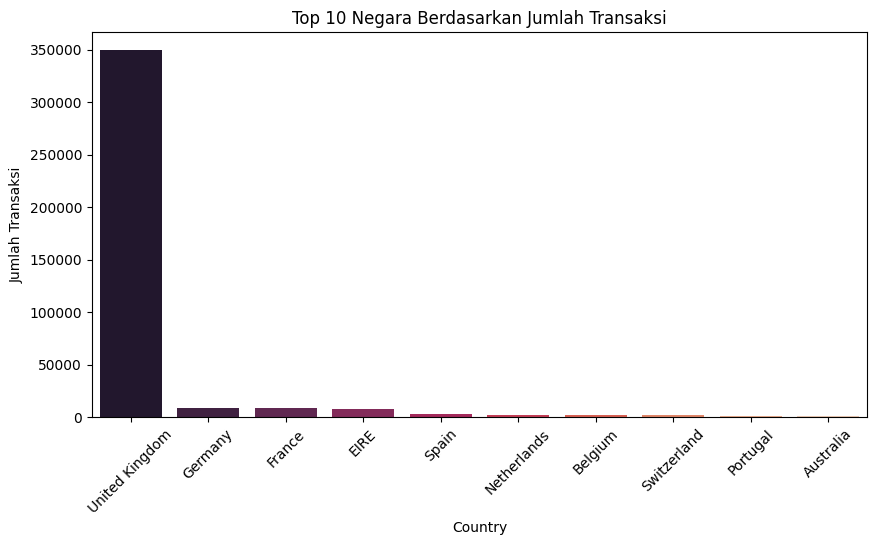

In [82]:
top_countries = df['Country'].value_counts().head(10)

top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'TransactionCount']

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_countries_df,
    x='Country',
    y='TransactionCount',
    hue='Country',
    palette='rocket',
    legend=False
)
plt.title('Top 10 Negara Berdasarkan Jumlah Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

## 4. Produk Terlaris

In [57]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

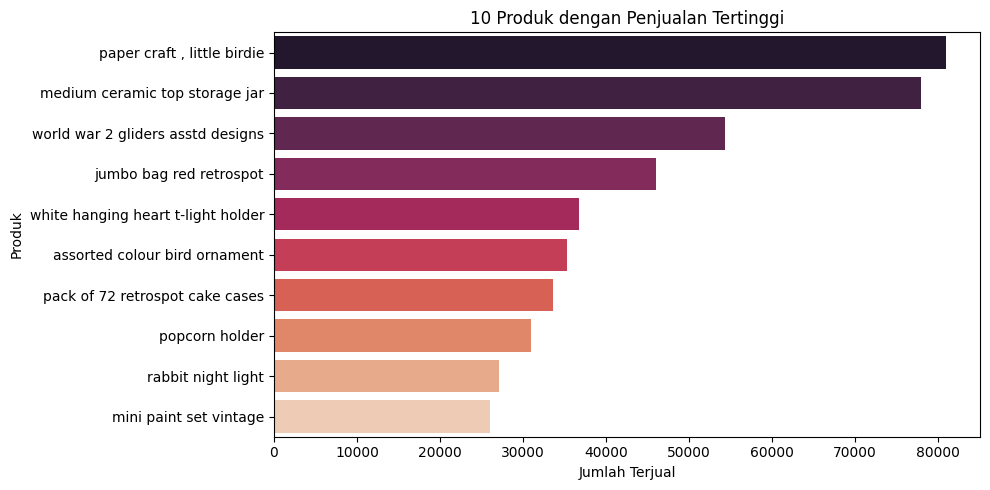

In [83]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products_df = top_products.reset_index()
top_products_df.columns = ['Description', 'TotalQuantity']

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_products_df,
    x='TotalQuantity',
    y='Description',
    hue='Description',
    palette='rocket',
    legend=False
)
plt.title('10 Produk dengan Penjualan Tertinggi')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()

## 5. Nilai Penjualan (Revenue) per Produk

In [59]:
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

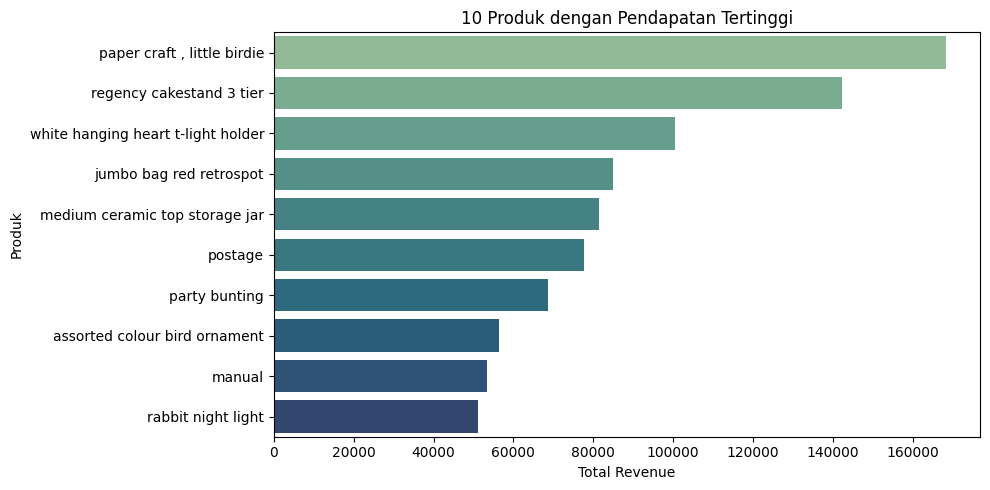

In [62]:
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_revenue_df = top_revenue.reset_index()
top_revenue_df.columns = ['Description', 'TotalRevenue']

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_revenue_df,
    x='TotalRevenue',
    y='Description',
    hue='Description',
    palette='crest',
    legend=False
)
plt.title('10 Produk dengan Pendapatan Tertinggi')
plt.xlabel('Total Revenue')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()

## 6. Analisis Waktu — Pola Penjualan per Bulan

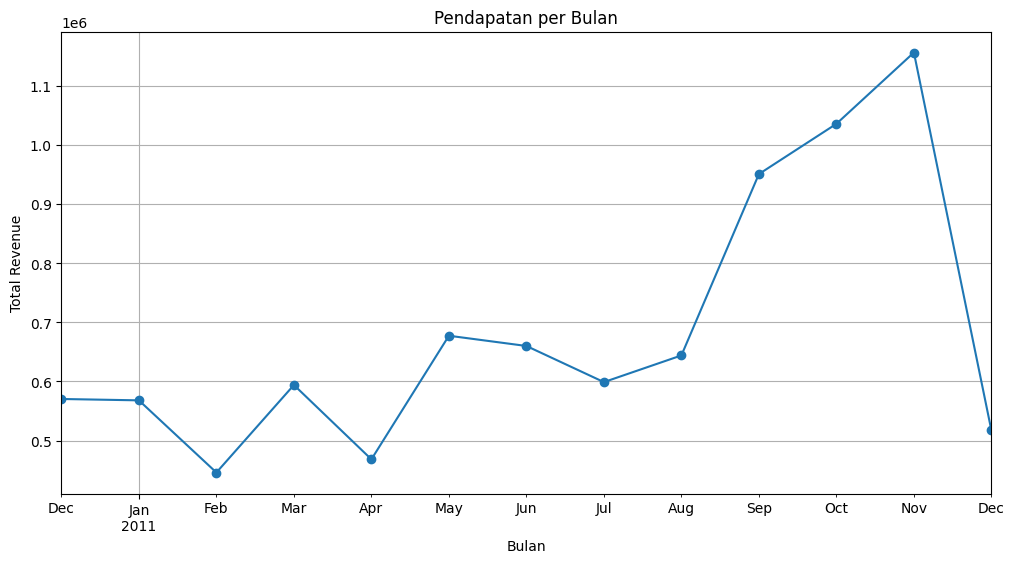

In [63]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Pendapatan per Bulan')
plt.ylabel('Total Revenue')
plt.xlabel('Bulan')
plt.grid(True)
plt.show()

## 7. Heatmap Waktu: Jam dan Hari Transaksi

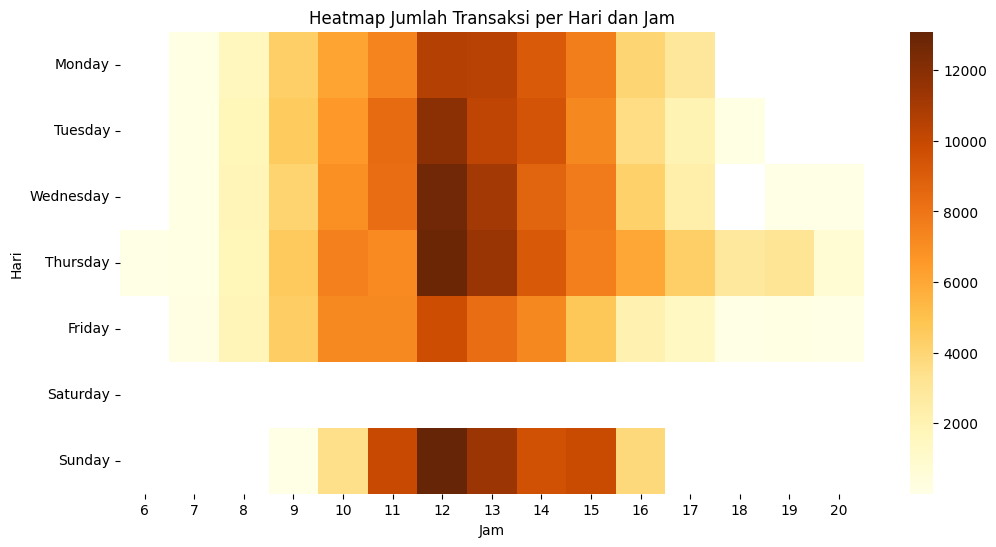

In [64]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()

heatmap_data = df.groupby(['Weekday','Hour'])['InvoiceNo'].count().unstack()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.reindex(ordered_days), cmap='YlOrBr')
plt.title('Heatmap Jumlah Transaksi per Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

## 8. Distribusi Harga Produk

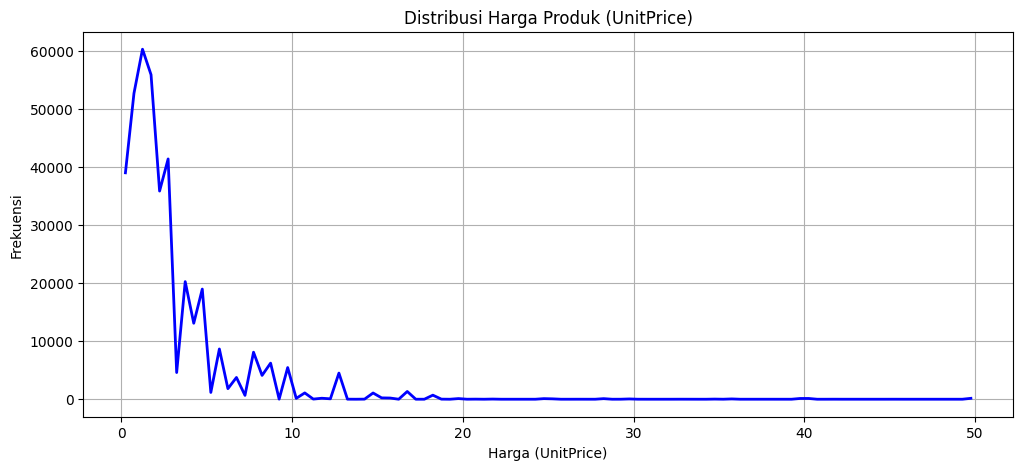

In [84]:
counts, bin_edges = np.histogram(df['UnitPrice'], bins=100, range=(0, 50))

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(12,5))
plt.plot(bin_centers, counts, color='blue', linewidth=2)
plt.title('Distribusi Harga Produk (UnitPrice)')
plt.xlabel('Harga (UnitPrice)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Analisis Lainnya

## 1. RFM Analysis

In [85]:
import pandas as pd
import numpy as np

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().rename('Monetary')
rfm = rfm.join(monetary)

rfm = rfm[rfm.index.notnull()]

def assign_rfm_score(series, ascending=True):
    bins = 4
    labels_asc = list(range(bins, 0, -1))
    labels_desc = list(range(1, bins + 1))
    labels = labels_asc if ascending else labels_desc

    for b in range(bins, 0, -1):
        try:
            score = pd.qcut(series, b, labels=labels[:b], duplicates='drop')
            return score.astype(int)
        except ValueError:
            continue
    return pd.Series([1]*len(series), index=series.index)

rfm['R_Score'] = assign_rfm_score(rfm['Recency'], ascending=True)
rfm['F_Score'] = assign_rfm_score(rfm['Frequency'], ascending=False)
rfm['M_Score'] = assign_rfm_score(rfm['Monetary'], ascending=False)

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

def segment_customer(score):
    if score >= 9:
        return 'VIP'
    elif score >= 6:
        return 'Loyal'
    elif score >= 3:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

print(rfm.head())

            Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346.0         326          1  77183.60        1        1        4   
12347.0           2          7   4310.00        4        2        4   
12348.0          75          4   1797.24        2        2        4   
12349.0          19          1   1757.55        3        1        4   
12350.0         310          1    334.40        1        1        2   

            RFM_Score    Segment  
CustomerID                        
12346.0             6      Loyal  
12347.0            10        VIP  
12348.0             8      Loyal  
12349.0             8      Loyal  
12350.0             4  Potential  


# Penjelasan Hasil Analisis RFM

---

## Kolom-Kolom RFM

- **Recency**: Lama hari sejak transaksi terakhir pelanggan. Nilai kecil berarti pelanggan baru saja bertransaksi.
- **Frequency**: Banyaknya transaksi unik yang dilakukan pelanggan. Nilai besar berarti pelanggan sering berbelanja.
- **Monetary**: Total uang yang dihabiskan pelanggan selama periode analisis.

---

## Skor RFM (R_Score, F_Score, M_Score)

Setiap metrik diubah menjadi skor antara 1 sampai 4 berdasarkan kuartil:

- **R_Score**: Skor untuk Recency, dengan 4 = pelanggan paling baru, dan 1 = pelanggan paling lama.
- **F_Score**: Skor untuk Frequency, dengan 4 = pelanggan paling sering transaksi, dan 1 = paling jarang.
- **M_Score**: Skor untuk Monetary, dengan 4 = pelanggan yang menghabiskan uang paling banyak, dan 1 = paling sedikit.

---

## RFM_Score

Merupakan jumlah dari ketiga skor (R_Score + F_Score + M_Score), sehingga nilainya berkisar antara 3 sampai 12.

- Nilai tinggi menunjukkan pelanggan baru, sering bertransaksi, dan berkontribusi banyak secara finansial.
- Nilai rendah menunjukkan pelanggan lama, jarang bertransaksi, dan kontribusi keuangan kecil.

---

## Segmentasi Pelanggan (Segment)

Berdasarkan nilai RFM_Score, pelanggan dikelompokkan ke dalam beberapa segmen sebagai berikut:

| RFM_Score | Segment   | Deskripsi Singkat                        |
|-----------|-----------|----------------------------------------|
| 9 - 12    | **VIP**      | Pelanggan terbaik, sangat berharga     |
| 6 - 8     | **Loyal**    | Pelanggan tetap yang cukup aktif       |
| 3 - 5     | **Potential**| Pelanggan potensial dengan peluang berkembang |
| < 3       | **At Risk**  | Pelanggan yang mungkin akan hilang     |

---

## Contoh Interpretasi Baris Data

| CustomerID | Recency | Frequency | Monetary  | R_Score | F_Score | M_Score | RFM_Score | Segment |
|------------|---------|-----------|-----------|---------|---------|---------|-----------|---------|
| 12346.0    | 326     | 1         | 77183.60  | 1       | 1       | 4       | 6         | Loyal   |

- **Recency = 326** hari → pelanggan sudah lama tidak transaksi → skor R rendah (1).
- **Frequency = 1** → jarang transaksi → skor F rendah (1).
- **Monetary = 77,183.60** → nilai transaksi besar → skor M tinggi (4).
- **RFM_Score = 6**, sehingga masuk dalam segmen **Loyal**.

---

## Manfaat Segmentasi Ini

Dengan segmentasi pelanggan ini, perusahaan bisa:

- **VIP**: Memberi penawaran eksklusif dan program loyalitas khusus.
- **Loyal**: Memberi promo atau pengingat supaya tetap aktif.
- **Potential**: Strategi upsell dan cross-sell untuk meningkatkan loyalitas.
- **At Risk**: Mengirim reminder atau diskon agar pelanggan tidak berpindah ke lain hati.

## Visualisasi

In [86]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score']
rfm['Segment'] = 'Potential'
rfm.loc[rfm['RFM_Score'] >= 6, 'Segment'] = 'Loyal'
rfm.loc[rfm['RFM_Score'] >= 7, 'Segment'] = 'VIP'

df_rfm = rfm.reset_index()

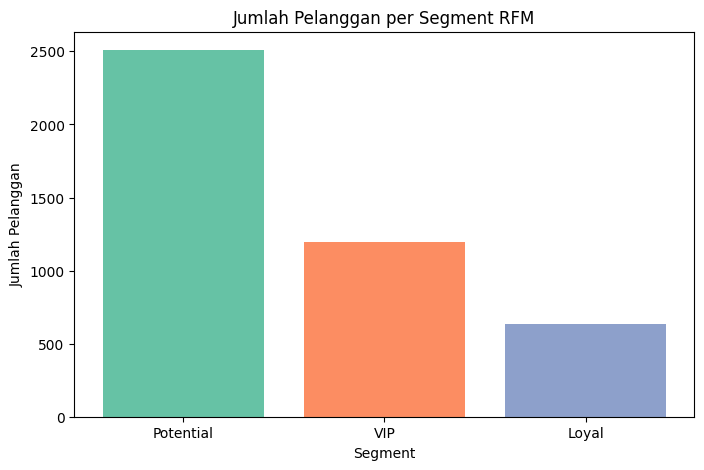

In [87]:
segment_counts = df_rfm['Segment'].value_counts()
segment_df = segment_counts.reset_index()
segment_df.columns = ['Segment', 'Count']

plt.figure(figsize=(8,5))
colors = sns.color_palette('Set2', n_colors=len(segment_df))
plt.bar(segment_df['Segment'], segment_df['Count'], color=colors)
plt.title('Jumlah Pelanggan per Segment RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()

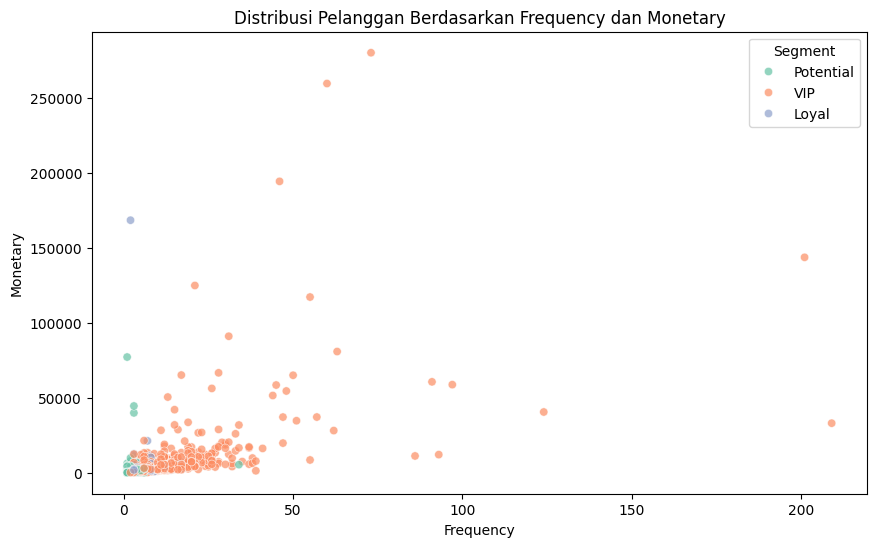

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2', alpha=0.7)
plt.title('Distribusi Pelanggan Berdasarkan Frequency dan Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Segment')
plt.show()

## 2. Analisis Produk Favorit dan Pola Pembelian

### a. Market Basket Analysis (Apriori Algorithm)

In [79]:
filtered_df = df[(df['Quantity'] > 0) & (~df['InvoiceNo'].str.contains('C', na=False))]

top_items = filtered_df['Description'].value_counts().head(50).index
filtered_df = filtered_df[filtered_df['Description'].isin(top_items)]

basket = filtered_df.pivot_table(
    index='InvoiceNo',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

basket = basket > 0
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1134,"(lunch bag pink polkadot, lunch bag woodland)","(lunch bag spaceboy design, lunch bag cars blue)",0.023424,0.028801,0.010018,0.427673,14.849330,1.0,0.009343,1.696930,0.955027,0.237347,0.410701,0.387750
1139,"(lunch bag spaceboy design, lunch bag cars blue)","(lunch bag pink polkadot, lunch bag woodland)",0.028801,0.023424,0.010018,0.347826,14.849330,1.0,0.009343,1.497417,0.960315,0.237347,0.332183,0.387750
1036,"(lunch bag black skull., lunch bag woodland)","(lunch bag pink polkadot, lunch bag spaceboy d...",0.025560,0.027033,0.010239,0.400576,14.818051,1.0,0.009548,1.623171,0.956975,0.241739,0.383922,0.389661
1041,"(lunch bag pink polkadot, lunch bag spaceboy d...","(lunch bag black skull., lunch bag woodland)",0.027033,0.025560,0.010239,0.378747,14.818051,1.0,0.009548,1.568507,0.958424,0.241739,0.362451,0.389661
1204,"(lunch bag pink polkadot, lunch bag woodland)","(lunch bag red retrospot, lunch bag spaceboy d...",0.023424,0.034399,0.011786,0.503145,14.626749,1.0,0.010980,1.943425,0.953978,0.256000,0.485444,0.422879
1209,"(lunch bag red retrospot, lunch bag spaceboy d...","(lunch bag pink polkadot, lunch bag woodland)",0.034399,0.023424,0.011786,0.342612,14.626749,1.0,0.010980,1.485541,0.964821,0.256000,0.326845,0.422879
1120,"(lunch bag pink polkadot, lunch bag woodland)","(lunch bag red retrospot, lunch bag cars blue)",0.023424,0.033736,0.011491,0.490566,14.541320,1.0,0.010701,1.896740,0.953566,0.251613,0.472780,0.415589
1125,"(lunch bag red retrospot, lunch bag cars blue)","(lunch bag pink polkadot, lunch bag woodland)",0.033736,0.023424,0.011491,0.340611,14.541320,1.0,0.010701,1.481033,0.963743,0.251613,0.324796,0.415589
1037,"(lunch bag black skull., lunch bag spaceboy d...","(lunch bag pink polkadot, lunch bag woodland)",0.030790,0.023424,0.010239,0.332536,14.196563,1.0,0.009517,1.463114,0.959090,0.232831,0.316526,0.384821
1040,"(lunch bag pink polkadot, lunch bag woodland)","(lunch bag black skull., lunch bag spaceboy d...",0.023424,0.030790,0.010239,0.437107,14.196563,1.0,0.009517,1.721837,0.951856,0.232831,0.419225,0.384821


### b. Pola Pembelian Musiman / Harian / Mingguan (Time Series)

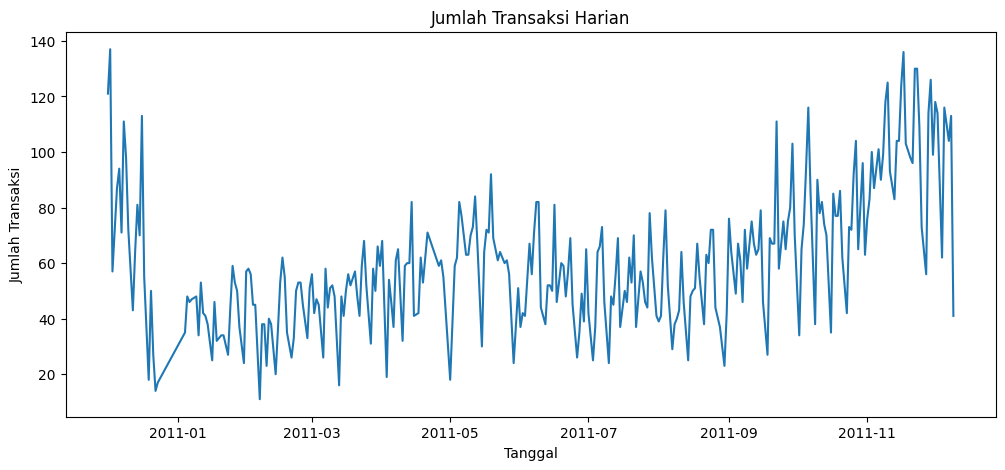

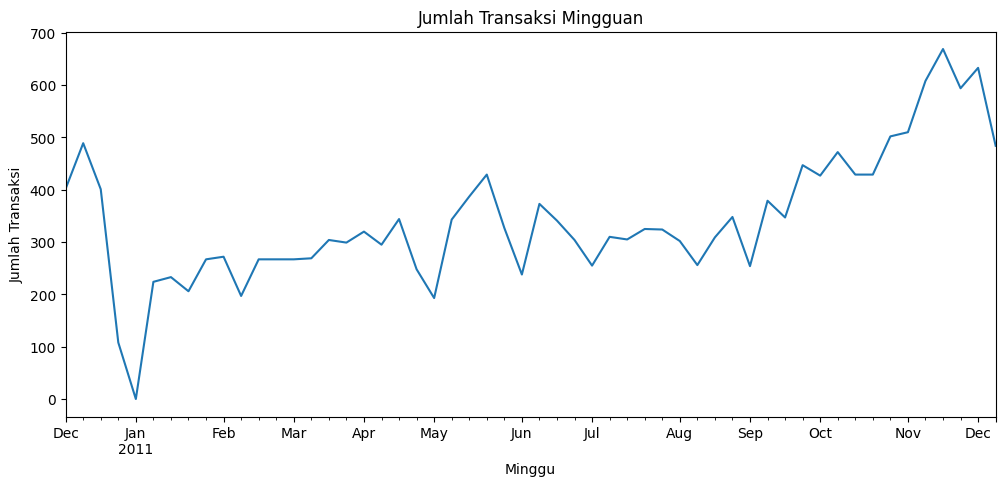

In [72]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_transactions = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique()

plt.figure(figsize=(12,5))
daily_transactions.plot()
plt.title('Jumlah Transaksi Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show()

weekly_transactions = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['InvoiceNo'].nunique()

plt.figure(figsize=(12,5))
weekly_transactions.plot()
plt.title('Jumlah Transaksi Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Transaksi')
plt.show()

### c. Analisis Produk Berdasarkan Kategori dan Harga

In [73]:
def categorize_product(desc):
    if 'HEART' in desc.upper():
        return 'Heart Items'
    elif 'LANTERN' in desc.upper():
        return 'Lanterns'
    elif 'BOTTLE' in desc.upper():
        return 'Bottles'
    else:
        return 'Others'

df['Category'] = df['Description'].apply(categorize_product)

category_price = df.groupby('Category')['UnitPrice'].mean().sort_values(ascending=False)
print(category_price)

Category
Bottles        4.179359
Lanterns       3.866600
Others         3.148377
Heart Items    2.654531
Name: UnitPrice, dtype: float64


## 3. Analisis Perilaku Pembelian dan Retensi Pelanggan

### a. Retensi Pelanggan dan Churn Rate

In [74]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
customer_month = df.groupby(['CustomerID', 'InvoiceMonth'])['InvoiceNo'].nunique().unstack(fill_value=0)

customer_month = customer_month.applymap(lambda x: 1 if x > 0 else 0)

churn_counts = []
months = customer_month.columns

for i in range(len(months) - 1):
    active_now = customer_month[months[i]] == 1
    active_next = customer_month[months[i + 1]] == 0
    churn = (active_now & active_next).sum()
    churn_counts.append({'Month': months[i], 'Churned_Customers': churn})

churn_df = pd.DataFrame(churn_counts)
print(churn_df)

      Month  Churned_Customers
0   2010-12                561
1   2011-01                479
2   2011-02                468
3   2011-03                670
4   2011-04                488
5   2011-05                646
6   2011-06                626
7   2011-07                561
8   2011-08                510
9   2011-09                777
10  2011-10                742
11  2011-11               1293


<ipython-input-74-7ce64e1c15ee>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_month = customer_month.applymap(lambda x: 1 if x > 0 else 0)


### b. Analisis Lifetime Value (LTV) Pelanggan

In [75]:
ltv = df.groupby('CustomerID')['TotalPrice'].sum()
ltv.describe()

,TotalPrice
count,4338.000000
mean,2048.688081
std,8985.230220
min,3.750000
25%,306.482500
50%,668.570000
75%,1660.597500
max,280206.020000


### c. Tren Pembelian Ulang Pelanggan

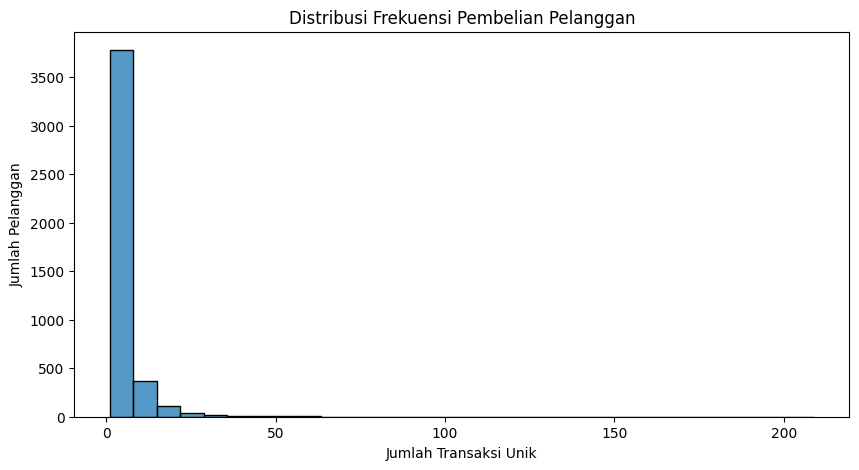

In [76]:
purchase_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10,5))
sns.histplot(purchase_counts, bins=30, kde=False)
plt.title('Distribusi Frekuensi Pembelian Pelanggan')
plt.xlabel('Jumlah Transaksi Unik')
plt.ylabel('Jumlah Pelanggan')
plt.show()